## ML/DL based models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### data loading

In [2]:
df_trees = pd.read_csv('../data Cleaned/housing_trees.csv')
df_trees.drop('Unnamed: 0', axis = 1, inplace = True)
df_trees.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [7]:
# corr = df_trees.corr()['median_house_value'].sort_values(ascending = False)
# print(corr)

In [3]:
df_distance = pd.read_csv('../data Cleaned/housing_distance.csv')
df_distance.drop('Unnamed: 0', axis = 1, inplace = True)
df_distance.head()

,longitude,latitude,housing_median_age,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household,median_income
0,0.211155,0.567481,0.784314,0.902266,2,6,2,1,6,1.000000
1,0.212151,0.565356,0.392157,0.708247,2,6,2,0,6,1.000000
2,0.210159,0.564293,1.000000,0.695051,2,7,2,1,8,0.877586
3,0.209163,0.564293,1.000000,0.672783,2,5,2,1,5,0.667939
4,0.209163,0.564293,1.000000,0.674638,2,5,2,1,6,0.434579


In [6]:
# corr = df_distance.corr()['median_house_value'].sort_values(ascending = False)
# print(corr)

### making the train and the test data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_trees = df_trees.drop('median_house_value', axis = 1)
y_trees = df_trees.median_house_value

In [6]:
X_distance = df_distance.drop('median_house_value', axis = 1)
y_distance = df_distance.median_house_value

In [7]:
X_train_trees, X_test_trees, y_train_trees, y_test_trees = train_test_split(X_trees, y_trees, random_state = 42, test_size = 0.25)
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y_distance, random_state = 42, test_size = 0.25)

In [8]:
print(f"{X_train_trees.shape} : {y_train_trees.shape} :: {X_test_trees.shape} : {y_test_trees.shape}")

(15480, 9) : (15480,) :: (5160, 9) : (5160,)


In [15]:
print(f"{X_train_distance.shape} : {y_train_distance.shape} :: {X_test_distance.shape} : {y_test_distance.shape}")

(15480, 9) : (15480,) :: (5160, 9) : (5160,)


### writing the metrices and functions

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [11]:
def metrices(y_test, y_pred) : 
    print(f"r2 score : {r2_score(y_test, y_pred)}")
    print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE : {root_mean_squared_error(y_test, y_pred)}")
    print(f"MSE : {mean_squared_error(y_test, y_pred)}")

In [12]:
def plot(y_test, y_pred) : 
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linewidth=2, label='Perfect Prediction Line')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.legend()
    plt.grid(True)
   
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.xlabel('Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()

## Testing the models

In [40]:
import joblib
scaler = joblib.load('scaler.pkl')

In [41]:
def plot_and_pred_distance(X_test, y_test, X_train, y_train, model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    metrices(y_test, y_pred)
    plot(y_test, y_pred)

In [28]:
### for the distance based models, we must use the inverse scaler in order to make the 
### comparison fair, otherwise no matter what but the variance in that the case of the 
### tree based models will always look higher than that of distance based models

### Distance based models

### 1. Linear regression

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
plot_and_pred_distance(X_test_distance, y_test_distance, X_train_distance, y_train_distance, model = lr)

ValueError: non-broadcastable output operand with shape (5160,1) doesn't match the broadcast shape (5160,5)

### 2. SVR

r2 score : 0.66533703215511
MAE : 0.09830938958365629
RMSE : 0.13720692042090948
MSE : 0.01882573901138979


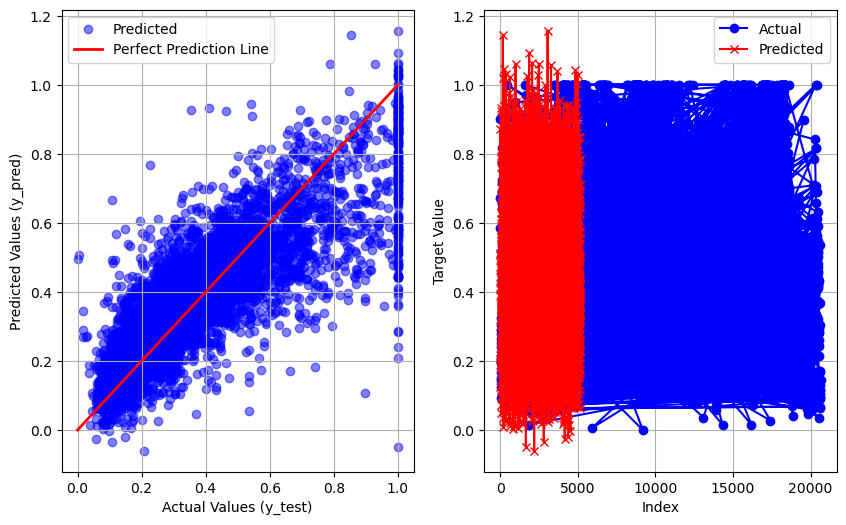

In [ ]:
from sklearn.svm import SVR
svr = SVR()
plot_and_pred_distance(X_test_distance, y_test_distance, X_train_distance, y_train_distance, model = svr)

### 3. KNN

r2 score : 0.65222913310871
MAE : 0.0940779172524151
RMSE : 0.13986813585331875
MSE : 0.019563095427082434


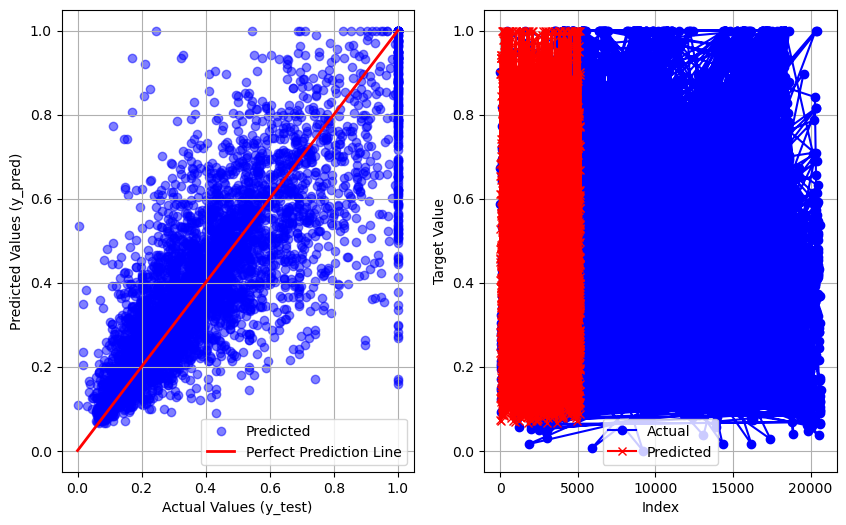

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
plot_and_pred_distance(X_test_distance, y_test_distance, X_train_distance, y_train_distance, model = knn)

### ------------Probablity based model-----------

In [32]:
def plot_and_pred(X_test, y_test, X_train, y_train, model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrices(y_test, y_pred)
    plot(y_test, y_pred)

### Gausian NB

r2 score : 0.2588227201936192
MAE : 71448.26492248062
RMSE : 99032.27734380636
MSE : 9807391955.900581


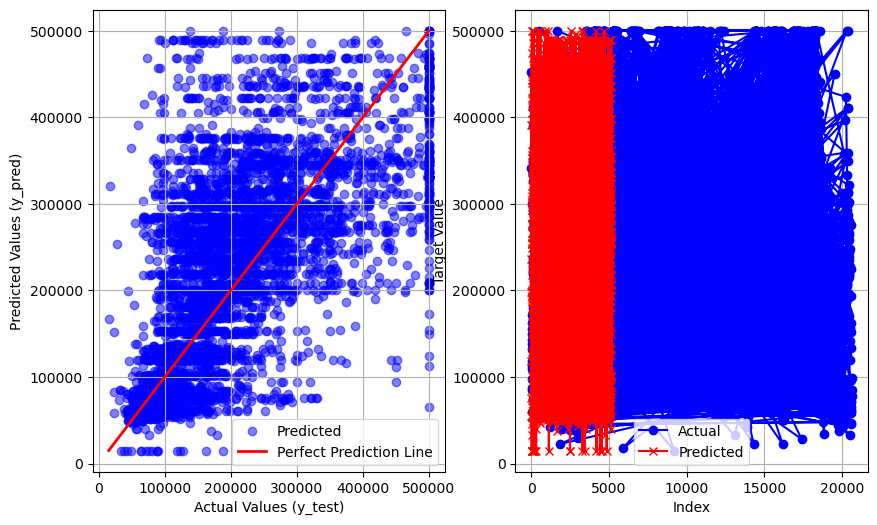

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
plot_and_pred(X_test_trees, y_test_trees, X_train_trees, y_train_trees, model = gnb)

### ------------------Tree based algos---------------

### 1. Decision Tree

r2 score : 0.6770221172669804
MAE : 40643.49069767442
RMSE : 65373.55596254783
MSE : 4273701819.188372


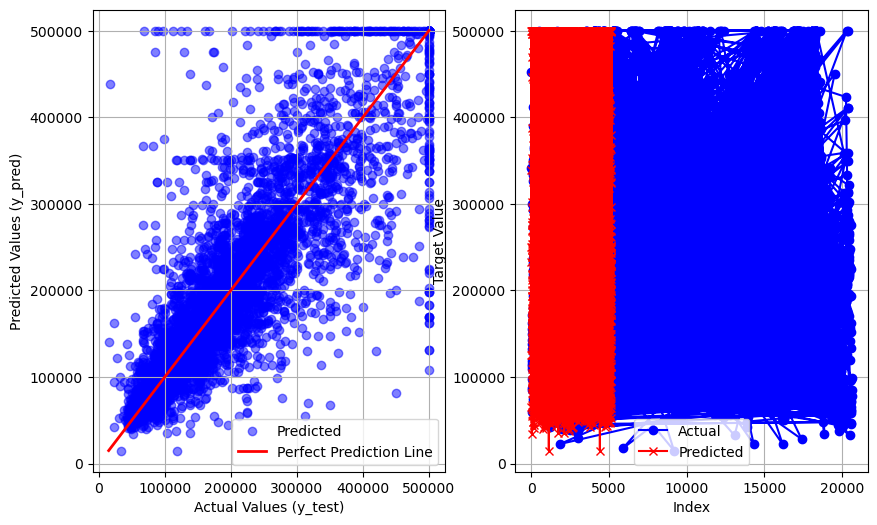

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
plot_and_pred(X_test_trees, y_test_trees, X_train_trees, y_train_trees, model = dtr)

### 2. Random forest Regressor

r2 score : 0.8168065578343209
MAE : 31327.422916666666
RMSE : 49234.6300255197
MSE : 2424048793.749806


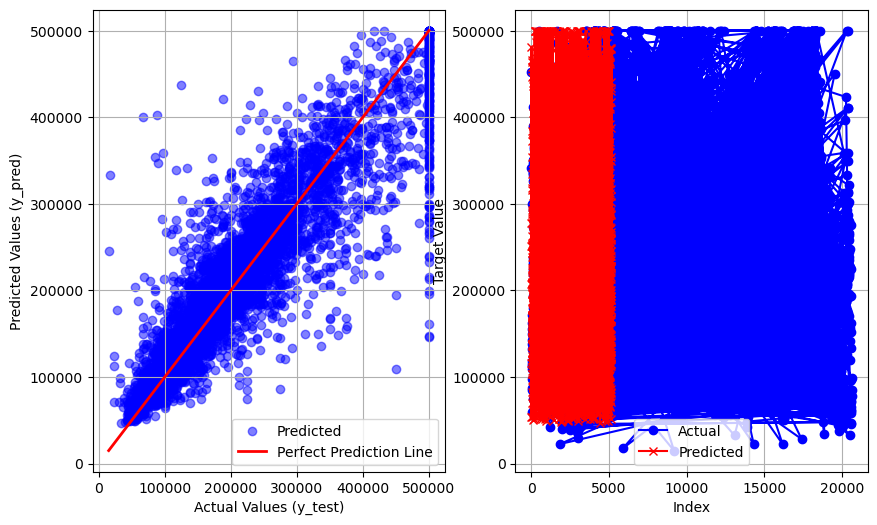

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
plot_and_pred(X_test_trees, y_test_trees, X_train_trees, y_train_trees, model = rfr)

### 3. Adaboost regressor

r2 score : 0.4996903246017502
MAE : 69085.60759962526
RMSE : 81364.53899274356
MSE : 6620188205.501687


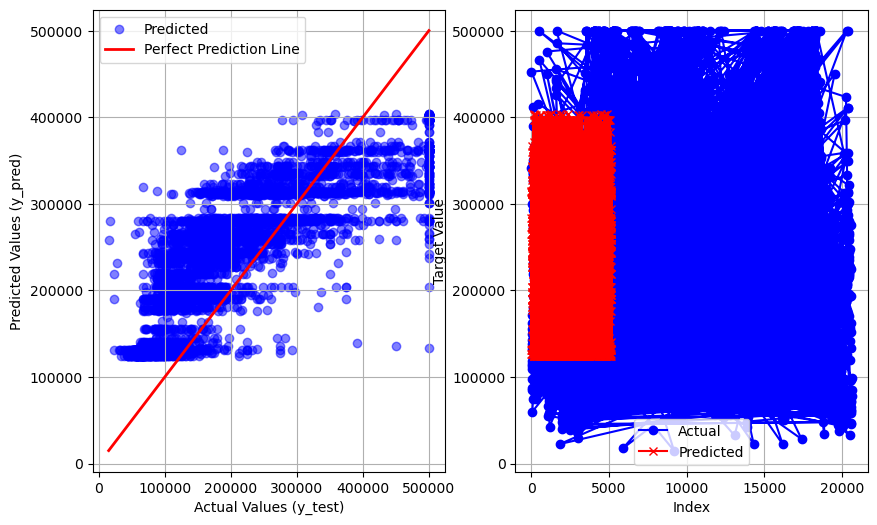

In [43]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
plot_and_pred(X_test_trees, y_test_trees, X_train_trees, y_train_trees, model = abr)

### 4. Graident boost regressor

r2 score : 0.7710954073496845
MAE : 37856.67991853368
RMSE : 55035.506838100395
MSE : 3028907012.926595


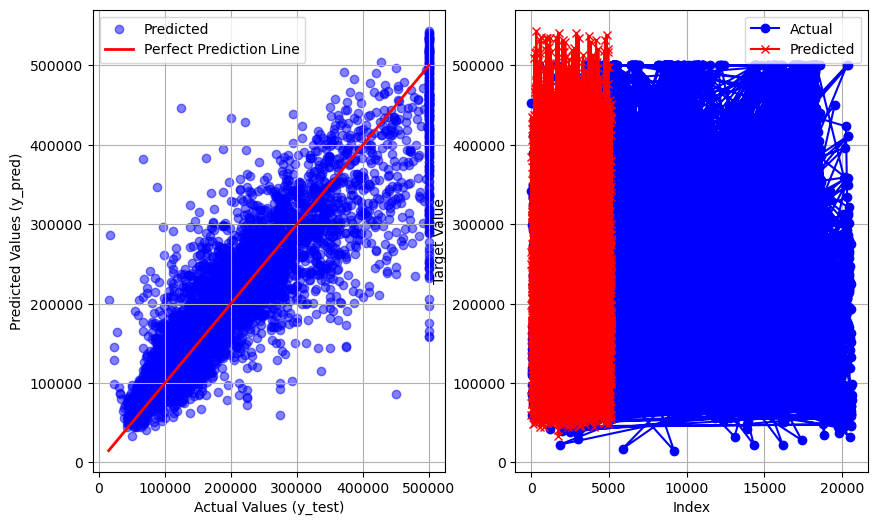

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
plot_and_pred(X_test_trees, y_test_trees, X_train_trees, y_train_trees, model = gbr)